In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
# Create a series of scatterplots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs Latitude
# Wind Speed (mph) vs. Latitude

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['saint-philippe',
 'vaini',
 'barahona',
 'ribeira grande',
 'te anau',
 'kapaa',
 'kahului',
 'nevers',
 'busselton',
 'albany',
 'namibe',
 'yar-sale',
 'santa rosa',
 'caravelas',
 'arraial do cabo',
 'meulaboh',
 'east london',
 'port hardy',
 'mys shmidta',
 'alofi',
 'grand centre',
 'bolungarvik',
 'taolanaro',
 'boende',
 'marawi',
 'belaya gora',
 'belushya guba',
 'hambantota',
 'nuuk',
 'bluff',
 'baswa',
 'barrow',
 'hamilton',
 'gravdal',
 'mar del plata',
 'puerto ayora',
 'punta arenas',
 'avarua',
 'atuona',
 'kamaishi',
 'zhanaozen',
 'sioux lookout',
 'ostrovnoy',
 'qaanaaq',
 'marsa matruh',
 'channel-port aux basques',
 'carnarvon',
 'provideniya',
 'vila velha',
 'mount isa',
 'mareeba',
 'orbetello',
 'kouroussa',
 'vao',
 'poyarkovo',
 'rikitea',
 'kodiak',
 'piacabucu',
 'bredasdorp',
 'acapulco',
 'birjand',
 'hun',
 'faanui',
 'pacifica',
 'lata',
 'tasiilaq',
 'ndele',
 'ushuaia',
 'port alfred',
 'vila',
 'chuy',
 'smithers',
 'logan',
 'penzance',
 'mataur

In [5]:
# Perform API Calls
## Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
#city_id = 117  # the city name is working, the city id is not working... the code above pulls city name
city = "east london"
# Build query URL
query_url = f'{url}appid={weather_api_key}&q={city}'       #&id={city_id}'

# get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


## Include a print log of each city as it'sbeing processed (with the city number and city name).
#cities = ['London','kapaa']
subset_cities = [cities[0],cities[1],cities[2],cities[3],cities[4]]
#city_ids = [117,103, 1,2,3]

In [6]:
# Convert Raw Data to DataFrame
# lat, lon, temp, humidity, cloudiness, windspeed
lon = []
lat = []
temp = [] # think about when to convert from kelvin to fahrenheit
humidity = []
clouds = []
windspeed = []
city_list = []
city_id_list = []

In [7]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json['id']  #[id]

1006984

In [8]:
for city in subset_cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'

    try:
        # get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        city_id_list.append(weather_json['id'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed']) 
        #Add the city last after everything else works
        print(f'City is: {city}.')
        city_list.append(weather_json['name'])
        print(weather_json)
    except:
        print(f'EXCEPTION: {weather_json} for {city}')
    time.sleep(2)
    

City is: saint-philippe.
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.41, 'feels_like': 68.22, 'temp_min': 66, 'temp_max': 84.2, 'pressure': 1013, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 120}, 'rain': {'1h': 0.17}, 'clouds': {'all': 0}, 'dt': 1613189679, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1613181977, 'sunset': 1613228173}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
City is: vaini.
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 92.86, 'temp_min': 86, 'temp_max': 86, 'pressure': 1012, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1613189682, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 

In [10]:
    
wx_dict = {'City':city_list,
          'City ID': city_id_list,
          'lon':lon,
          'lat':lat,
          'temperature':temp,
          'humidity':humidity,
          'clouds':clouds,
          'windspeed':windspeed}

print(f'City: {city_list} & ID: {city_id_list} & lon: {lon} & lat: {lat}')
wx_df = pd.DataFrame(wx_dict)


## Export the city data into a .csv.
wx_df.to_csv("../output_data/cities_weather.csv", index=False, header=True)

## Display the DataFrame
wx_df = wx_df.set_index('City')
wx_df

City: ['Saint-Philippe', 'Vaini', 'Santa Cruz de Barahona', 'Ribeira Grande', 'Te Anau'] & ID: [935215, 4032243, 3492985, 3372707, 2181625] & lon: [55.7679, -175.2, -71.1008, -28.7, 167.7167] & lat: [-21.3585, -21.2, 18.2085, 38.5167, -45.4167]


,City ID,lon,lat,temperature,humidity,clouds,windspeed
City,,,,,,,
Saint-Philippe,935215,55.7679,-21.3585,77.41,61,0,24.16
Vaini,4032243,-175.2000,-21.2000,86.00,74,75,8.05
Santa Cruz de Barahona,3492985,-71.1008,18.2085,75.09,77,2,9.42
Ribeira Grande,3372707,-28.7000,38.5167,61.00,78,100,31.07
Te Anau,2181625,167.7167,-45.4167,67.68,38,57,8.23


In [11]:
# Plotting the Data
## Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

today = date.today()

# Textual month, day and year	
today = today.strftime("%B %d, %Y")
print("today", today)


today February 12, 2021


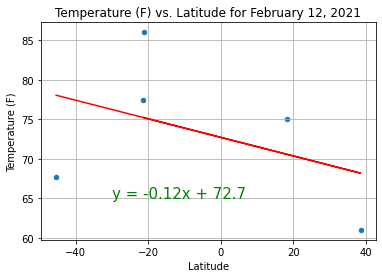

<Figure size 720x360 with 0 Axes>

In [20]:
# Create a series of scatterplots to showcase the following relationships:

# Temperature (F) vs. Latitude
# This is not needed, obtained Temp in F from the API
# convert temperature from Kelvin to Fahrenheit
# wx_df['temp_f'] = wx_df['temp_k'] * 9/5 - 459.67

title = f'Temperature (F) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = wx_df['lat']
y_values = wx_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,65), fontsize=15, color='green')

# set the figure size
fig = plt.figure(figsize=(10,5))
# save the plot as an image
fig.savefig('../output_data/temp v lat.png', bbox_inches='tight', dpi=150)
# TODO: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.show()

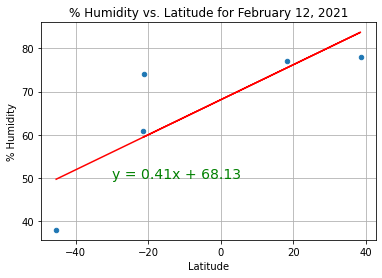

In [21]:
# Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = wx_df['lat']
y_values = wx_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,50), fontsize=14,color='green')

plt.show()

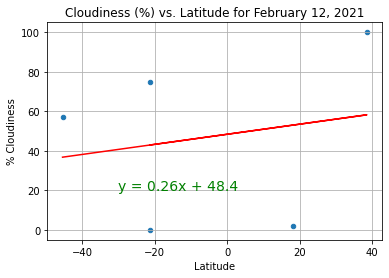

In [22]:
# Cloudiness (%) vs Latitude
title = f'Cloudiness (%) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = wx_df['lat']
y_values = wx_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=14, color='green')

plt.show()

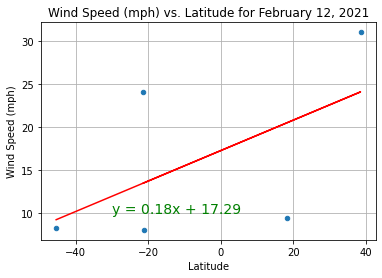

In [25]:
# Wind Speed (mph) vs. Latitude
title = f'Wind Speed (mph) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = wx_df['lat']
y_values = wx_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,10), fontsize=14, color='green')
plt.show()

In [ ]:
# Inspect the data and remove the cities where the humidity > 100%.
#high_humid_df = wx_df[wx_df['humidity'] > 80]
#high_humid_df

wx_df = wx_df[wx_df['humidity'] < 101]
wx_df
## Skip this step if there are no cities that have humidity > 100%.

In [ ]:
## Save the plotted figures as .pngs.